In [20]:
import pandas as pd

# Load the cleaned data
df_filtered= pd.read_csv('cleaned_covid_data.csv')
print(df_filtered)
df_filtered['date'] = pd.to_datetime(df_filtered['date']) #Convert date column to datetime
df_filtered[['location', 'total_cases']].groupby('location').describe() #Now get descriptive statistics


     iso_code      continent       location        date  total_cases  \
0         IND           Asia          India  2020-01-05          0.0   
1         IND           Asia          India  2020-01-06          0.0   
2         IND           Asia          India  2020-01-07          0.0   
3         IND           Asia          India  2020-01-08          0.0   
4         IND           Asia          India  2020-01-09          0.0   
...       ...            ...            ...         ...          ...   
6699      USA  North America  United States  2024-07-31  103436829.0   
6700      USA  North America  United States  2024-08-01  103436829.0   
6701      USA  North America  United States  2024-08-02  103436829.0   
6702      USA  North America  United States  2024-08-03  103436829.0   
6703      USA  North America  United States  2024-08-04  103436829.0   

      new_cases  new_cases_smoothed  total_deaths  new_deaths  \
0           0.0                 NaN           0.0         0.0   
1    

total_cases                                               \
                     count          mean           std  min         25%   
location                                                                  
India               1682.0  3.106995e+07  1.741654e+07  0.0  10991651.0   
Kenya               1674.0  2.370479e+05  1.313891e+05  0.0    103993.0   
United Kingdom      1674.0  1.479592e+07  1.042182e+07  0.0   4185806.0   
United States       1674.0  6.327030e+07  4.021421e+07  0.0  27864340.0   

                                                      
                       50%          75%          max  
location                                              
India           43038684.0   44992486.5   45041748.0  
Kenya             323609.0     343312.0     344106.0  
United Kingdom  21820947.0   24631888.0   24974629.0  
United States   79946773.0  103436829.0  103436829.0

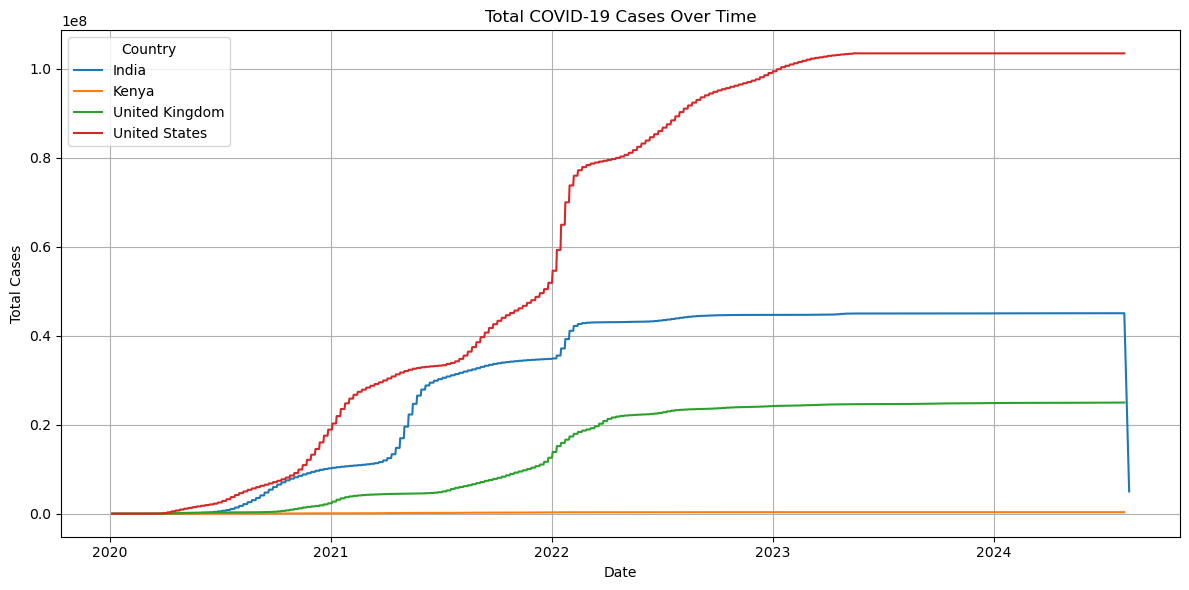

In [19]:
#Plot total cases over time for selected countries
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for country in df_filtered['location'].unique():
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()






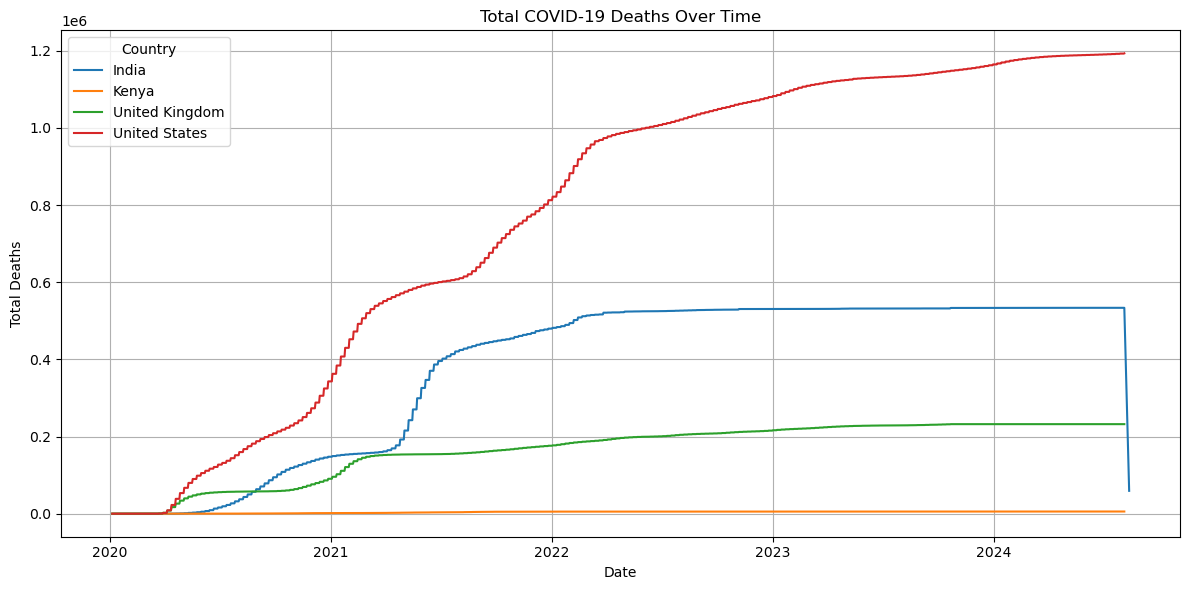

In [21]:
#Plot total deaths over time
plt.figure(figsize=(12, 6))

# Plot for each selected country
for country in df_filtered['location'].unique():
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

# Customize the plot
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


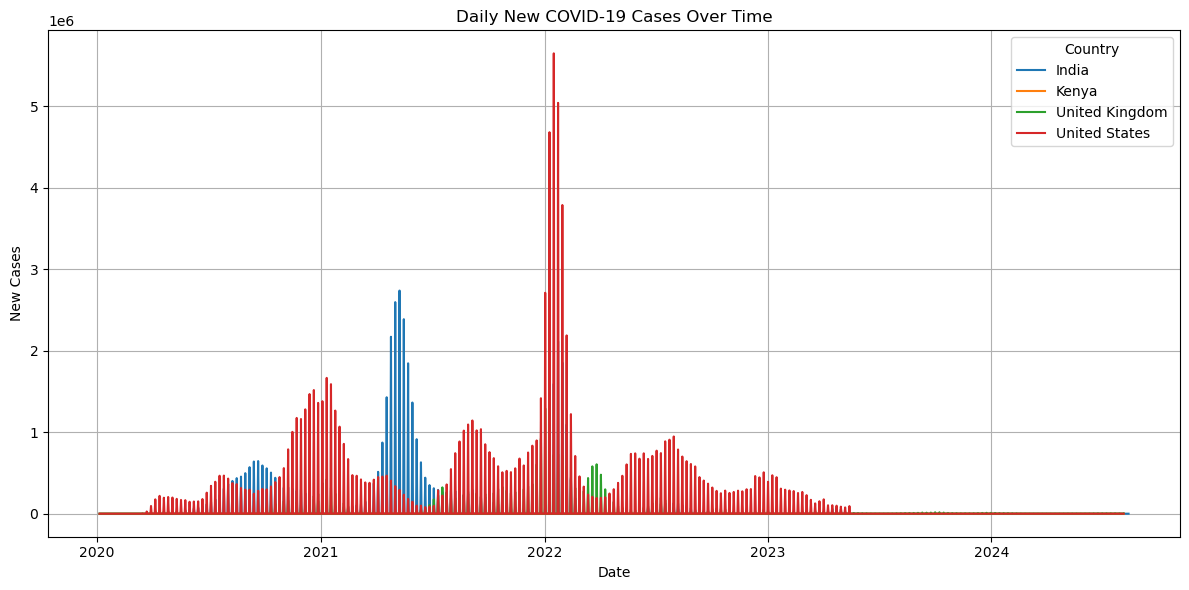

In [22]:
#Compare daily new cases between countries.

plt.figure(figsize=(12, 6))

# Plot daily new cases for each selected country
for country in df_filtered['location'].unique():
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

# Customize plot
plt.title('Daily New COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
# Avoid division by zero or NaNs
df_filtered = df_filtered.copy()  # avoid SettingWithCopyWarning

df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']

# Optional: Replace inf or NaN values if needed
df_filtered['death_rate'] = df_filtered['death_rate'].replace([float('inf')], None)
df_filtered[['date', 'location', 'total_cases', 'total_deaths', 'death_rate']].head()


,date,location,total_cases,total_deaths,death_rate
0,2020-01-05,India,0.0,0.0,NaN
1,2020-01-06,India,0.0,0.0,NaN
2,2020-01-07,India,0.0,0.0,NaN
3,2020-01-08,India,0.0,0.0,NaN
4,2020-01-09,India,0.0,0.0,NaN
